In [1]:
import numpy as np
import pandas as pd
from gradient_boosting import BinaryGradientBoostingClassifier
from id3.id3 import DecisionTree
from utils import train_test_split, classification_report
import matplotlib.pyplot as plt

In [2]:
from id3 import DecisionTree

data = pd.read_csv("toy_data/train.csv")
X = data.drop(
    columns=[
        "class",
        "cap-diameter",
        "stem-height",
        "stem-width",
    ]
).set_index("Id")

y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
gbc = BinaryGradientBoostingClassifier(DecisionTree(max_depth=10, regression=True), n_trees=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  Class    | Precision  |   Recall   |  F1-Score 
---------------------------------------------
    0      |    0.59    |    0.32    |    0.42   
    1      |    0.60    |    0.82    |    0.69   



In [4]:
# Plot the loss curve
test_score = np.zeros((gbc.n_trees,), dtype=np.float64)
train_score = np.zeros((gbc.n_trees,), dtype=np.float64)

y_test_p = np.where(y_test == gbc.classes[0], 0.0, 1.0)  # Map classes to 0 and 1
y_train_p = np.where(y_train == gbc.classes[0], 0.0, 1.0)  # Map classes to 0 and 1


for i, y_pred in enumerate(gbc.staged_predict(X_test).T):
    test_score[i] = gbc.cross_entropy(y_test_p, y_pred).mean()

for i, y_pred in enumerate(gbc.staged_predict(X_train).T):
    train_score[i] = gbc.cross_entropy(y_train_p, y_pred).mean()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Loss')

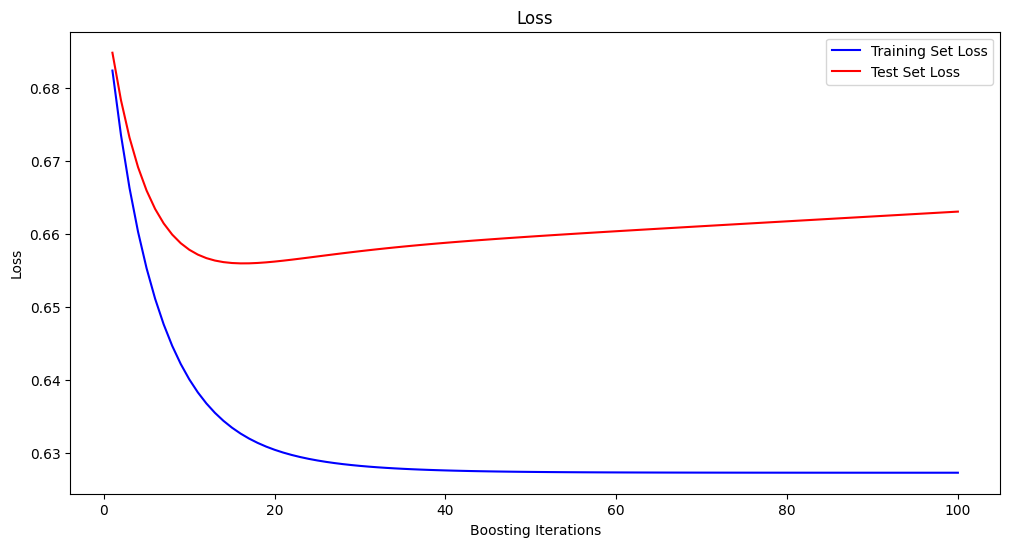

In [5]:
plt.figure(figsize=(12, 6))

plt.title("Loss")
plt.plot(np.arange(gbc.n_trees) + 1, train_score, "b-", label="Training Set Loss")
plt.plot(np.arange(gbc.n_trees) + 1, test_score, "r-", label="Test Set Loss")
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Loss")